In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## H8.2: C-SVM with standard parameters

In [2]:
def sample_data(n):
    x = np.zeros((n, 2))
    for i, coin in enumerate(np.random.rand(n/2)):
        if coin < 0.5:
            x[i] = np.random.multivariate_normal([0, 1], 0.1 * np.identity(2))
        else:
            x[i] = np.random.multivariate_normal([1, 0], 0.1 * np.identity(2))

    for i, coin in enumerate(np.random.rand(n/2)):
        if coin < 0.5:
            x[n/2+i] = np.random.multivariate_normal([0, 0], 0.1 * np.identity(2))
        else:
            x[n/2+i] = np.random.multivariate_normal([1, 1], 0.1 * np.identity(2))
            
    t = np.zeros(n)
    t[:n/2] = -1
    t[n/2:] = 1
            
    return x, t
            
sample_data(2)

(array([[ 0.63935274,  0.19569204],
        [-0.31342762, -0.64946082]]), array([-1.,  1.]))

In [3]:
train_x, train_t = sample_data(80)
test_x, test_t = sample_data(80)

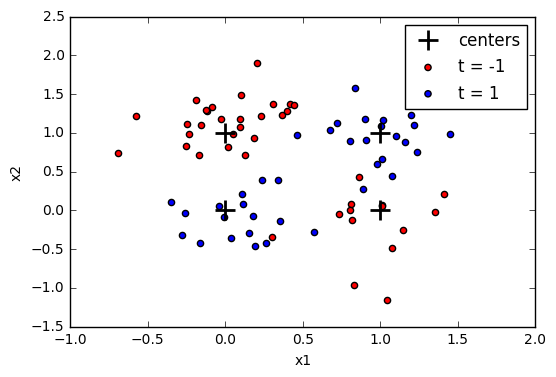

In [4]:
plt.scatter(train_x[:40, 0], train_x[:40, 1], c='r', label='t = -1')
plt.scatter(train_x[40:, 0], train_x[40:, 1], c='b', label='t = 1')
plt.plot([0, 0, 1, 1], [0, 1, 0, 1], 'k+', markersize=15, markeredgewidth=2, label='centers')
plt.legend(numpoints=1, scatterpoints=1)
plt.xlabel('x1')
plt.ylabel('x2')

In [5]:
from sklearn.svm import SVC

In [6]:
svc = SVC()
svc.fit(train_x, train_t)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
svc.score(train_x, train_t), svc.score(test_x, test_t)

(0.9375, 0.77500000000000002)

In [8]:
svc.n_support_

array([24, 22])

(-1, 2)

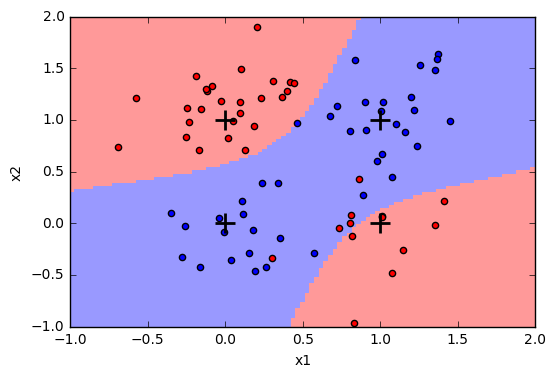

In [9]:
num_points = 100

xx, yy = np.meshgrid(np.linspace(-1, 2, num_points), np.linspace(-1, 2, num_points))
pred_t = np.zeros((num_points, num_points))
for i in range(num_points):
    for j in range(num_points):
        pred_t[i, j] = svc.predict([[xx[i, j], yy[i, j]]])

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('rb', [[1., 0.6, 0.6], [0.6, 0.6, 1.]], 2)
plt.pcolor(xx, yy, pred_t, cmap=cmap)

plt.scatter(train_x[:40, 0], train_x[:40, 1], c='r', label='t = -1')
plt.scatter(train_x[40:, 0], train_x[40:, 1], c='b', label='t = 1')
plt.plot([0, 0, 1, 1], [0, 1, 0, 1], 'k+', markersize=15, markeredgewidth=2, label='centers')
#plt.legend(numpoints=1, scatterpoints=1)
plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(-1, 2)
plt.ylim(-1, 2)

## H8.3: C-SVM parameter optimization

#### a)

In [10]:
param_grid = {'C': 2.**np.arange(-6, 12, 2), 'gamma': 2.**np.arange(-5, 10, 1)}
param_grid

{'C': array([  1.56250000e-02,   6.25000000e-02,   2.50000000e-01,
          1.00000000e+00,   4.00000000e+00,   1.60000000e+01,
          6.40000000e+01,   2.56000000e+02,   1.02400000e+03]),
 'gamma': array([  3.12500000e-02,   6.25000000e-02,   1.25000000e-01,
          2.50000000e-01,   5.00000000e-01,   1.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   8.00000000e+00,
          1.60000000e+01,   3.20000000e+01,   6.40000000e+01,
          1.28000000e+02,   2.56000000e+02,   5.12000000e+02])}

In [11]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid)
grid_search.fit(train_x, train_t)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.56250e-02,   6.25000e-02,   2.50000e-01,   1.00000e+00,
         4.00000e+00,   1.60000e+01,   6.40000e+01,   2.56000e+02,
         1.02400e+03]), 'gamma': array([  3.12500e-02,   6.25000e-02,   1.25000e-01,   2.50000e-01,
         5.00000e-01,   1.00000e+00,   2.00000e+00,   4.00000e+00,
         8.00000e+00,   1.60000e+01,   3.20000e+01,   6.40000e+01,
         1.28000e+02,   2.56000e+02,   5.12000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [12]:
import pandas as pd
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000333,0.001000,0.7375,0.742640,0.015625,0.03125,"{u'C': 0.015625, u'gamma': 0.03125}",109,0.642857,0.653846,0.769231,0.777778,0.807692,0.796296,4.714827e-04,0.000000e+00,0.071158,0.063240
1,0.000667,0.000333,0.7500,0.761396,0.015625,0.0625,"{u'C': 0.015625, u'gamma': 0.0625}",105,0.642857,0.673077,0.807692,0.796296,0.807692,0.814815,4.713704e-04,4.713704e-04,0.078621,0.062907
2,0.001000,0.001000,0.7750,0.793447,0.015625,0.125,"{u'C': 0.015625, u'gamma': 0.125}",96,0.714286,0.769231,0.807692,0.796296,0.807692,0.814815,1.123916e-07,1.123916e-07,0.044552,0.018718
3,0.000333,0.000667,0.8000,0.818851,0.015625,0.25,"{u'C': 0.015625, u'gamma': 0.25}",75,0.785714,0.826923,0.807692,0.814815,0.807692,0.814815,4.713704e-04,4.714827e-04,0.010483,0.005708
4,0.001000,0.000333,0.8125,0.818851,0.015625,0.5,"{u'C': 0.015625, u'gamma': 0.5}",68,0.785714,0.826923,0.807692,0.814815,0.846154,0.814815,8.164374e-04,4.714827e-04,0.025034,0.005708
5,0.000667,0.000000,0.8250,0.850427,0.015625,1,"{u'C': 0.015625, u'gamma': 1.0}",59,0.785714,0.884615,0.846154,0.814815,0.846154,0.851852,4.714266e-04,0.000000e+00,0.028828,0.028514
6,0.000333,0.000000,0.8875,0.906220,0.015625,2,"{u'C': 0.015625, u'gamma': 2.0}",32,0.821429,0.903846,0.923077,0.925926,0.923077,0.888889,4.713704e-04,0.000000e+00,0.048483,0.015213
7,0.000667,0.000000,0.8750,0.956315,0.015625,4,"{u'C': 0.015625, u'gamma': 4.0}",38,0.785714,0.961538,0.884615,0.925926,0.961538,0.981481,4.713704e-04,0.000000e+00,0.072485,0.022979
8,0.000333,0.000333,0.8750,0.968898,0.015625,8,"{u'C': 0.015625, u'gamma': 8.0}",38,0.821429,0.980769,0.846154,0.962963,0.961538,0.962963,4.713704e-04,4.713704e-04,0.060900,0.008394
9,0.000000,0.000667,0.8500,0.968898,0.015625,16,"{u'C': 0.015625, u'gamma': 16.0}",44,0.821429,0.980769,0.769231,0.962963,0.961538,0.962963,0.000000e+00,4.713704e-04,0.080307,0.008394


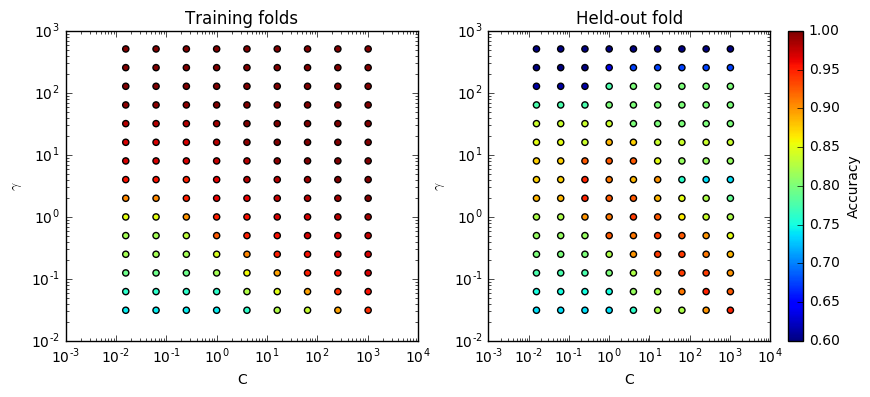

In [13]:
fig = plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Training folds')
plt.scatter(cv_results['param_C'], cv_results['param_gamma'], c=cv_results['mean_train_score'], vmin=0.6, vmax=1.)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('C')
plt.ylabel(r'$\gamma$')

plt.subplot(122)
plt.title('Held-out fold')
plt.scatter(cv_results['param_C'], cv_results['param_gamma'], c=cv_results['mean_test_score'], vmin=0.6, vmax=1.)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('C')
plt.ylabel(r'$\gamma$')
plt.colorbar(label='Accuracy')

#### b)

In [14]:
best_svc = grid_search.best_estimator_
best_svc.score(train_x, train_t), best_svc.score(test_x, test_t)

(0.9375, 0.84999999999999998)

In [15]:
best_svc.n_support_

array([26, 27])

(-1, 2)

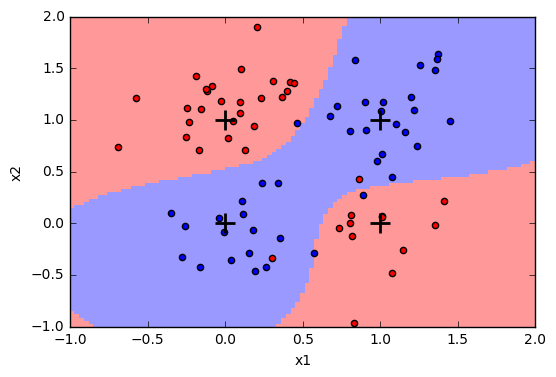

In [16]:
num_points = 100

xx, yy = np.meshgrid(np.linspace(-1, 2, num_points), np.linspace(-1, 2, num_points))
pred_t = np.zeros((num_points, num_points))
for i in range(num_points):
    for j in range(num_points):
        pred_t[i, j] = best_svc.predict([[xx[i, j], yy[i, j]]])

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('rb', [[1., 0.6, 0.6], [0.6, 0.6, 1.]], 2)
plt.pcolor(xx, yy, pred_t, cmap=cmap)

plt.scatter(train_x[:40, 0], train_x[:40, 1], c='r', label='t = -1')
plt.scatter(train_x[40:, 0], train_x[40:, 1], c='b', label='t = 1')
plt.plot([0, 0, 1, 1], [0, 1, 0, 1], 'k+', markersize=15, markeredgewidth=2, label='centers')
#plt.legend(numpoints=1, scatterpoints=1)
plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(-1, 2)
plt.ylim(-1, 2)

#### c)

* Equal accuracy on training dataset (93.8 %)
* Optimized SVM has better accuracy on test dataset (85.0 % vs 77.5%)
* Optimized SVM has more support vectors for both classes (26/27 vs 24/22)
* Visually, no significant difference can be recognized

In [26]:
svc = SVC(C=grid_search.best_params_['C'] / 4., gamma=grid_search.best_params_['gamma'])
svc.fit(train_x, train_t)
svc.score(train_x, train_t), svc.score(test_x, test_t)

(0.90000000000000002, 0.73750000000000004)

In [27]:
svc = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'] / 4.)
svc.fit(train_x, train_t)
svc.score(train_x, train_t), svc.score(test_x, test_t)

(0.84999999999999998, 0.6875)

If C or $\gamma$ are divided by 4 (from the best parameters), the accuracy decreases.